In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [16]:
db = pd.read_csv('/content/genres_v2.csv')

<ipython-input-16-9bf93b43ed6c>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('/content/genres_v2.csv')


In [17]:
db.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [18]:
db.loc[db['song_name'].isna()]['Unnamed: 0'].isna().sum()

6

In [19]:
db['song_name'] = db['song_name'].fillna(db['title'])
db['song_name'] = db['song_name'].fillna(db['Unnamed: 0'])
db = db.drop(['Unnamed: 0','title'],axis= 1)
db = db.dropna()

In [20]:
db.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           0
dtype: int64

In [21]:
print(f"Number of genres in given dataset: {len(db['genre'].unique())}")

Number of genres in given dataset: 15


In [22]:
db = db.drop(['track_href','analysis_url','uri','id','type','genre','song_name'],axis =1)

In [23]:
db.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


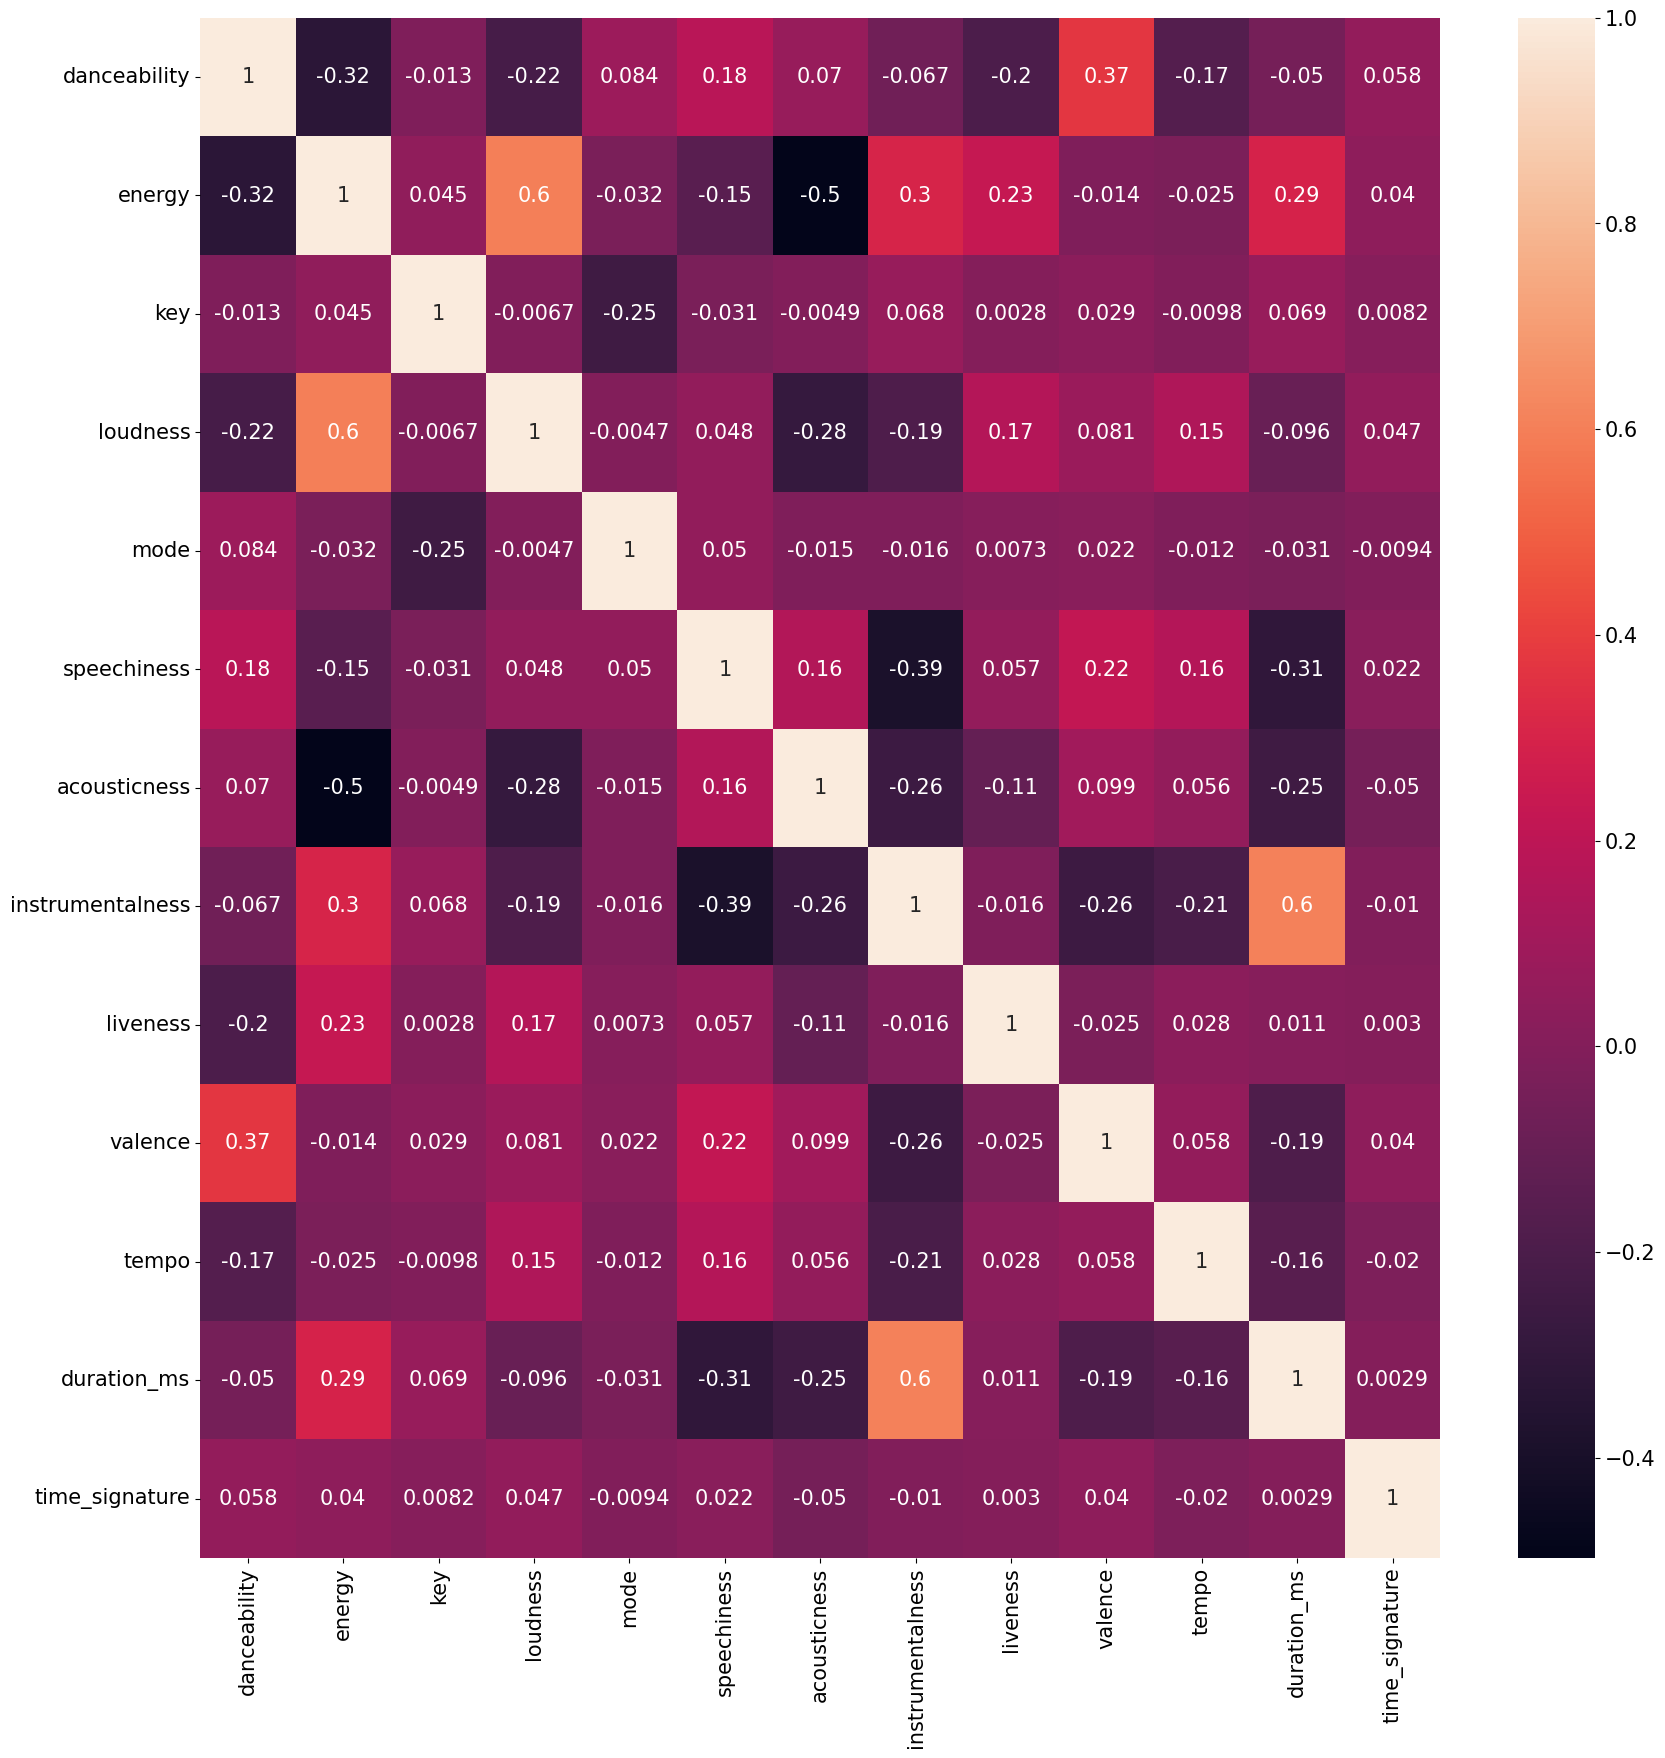

In [24]:
plt.figure(figsize = (20,20))
corr = db.corr()
dataplot = sns.heatmap(corr, annot=True)
plt.show()


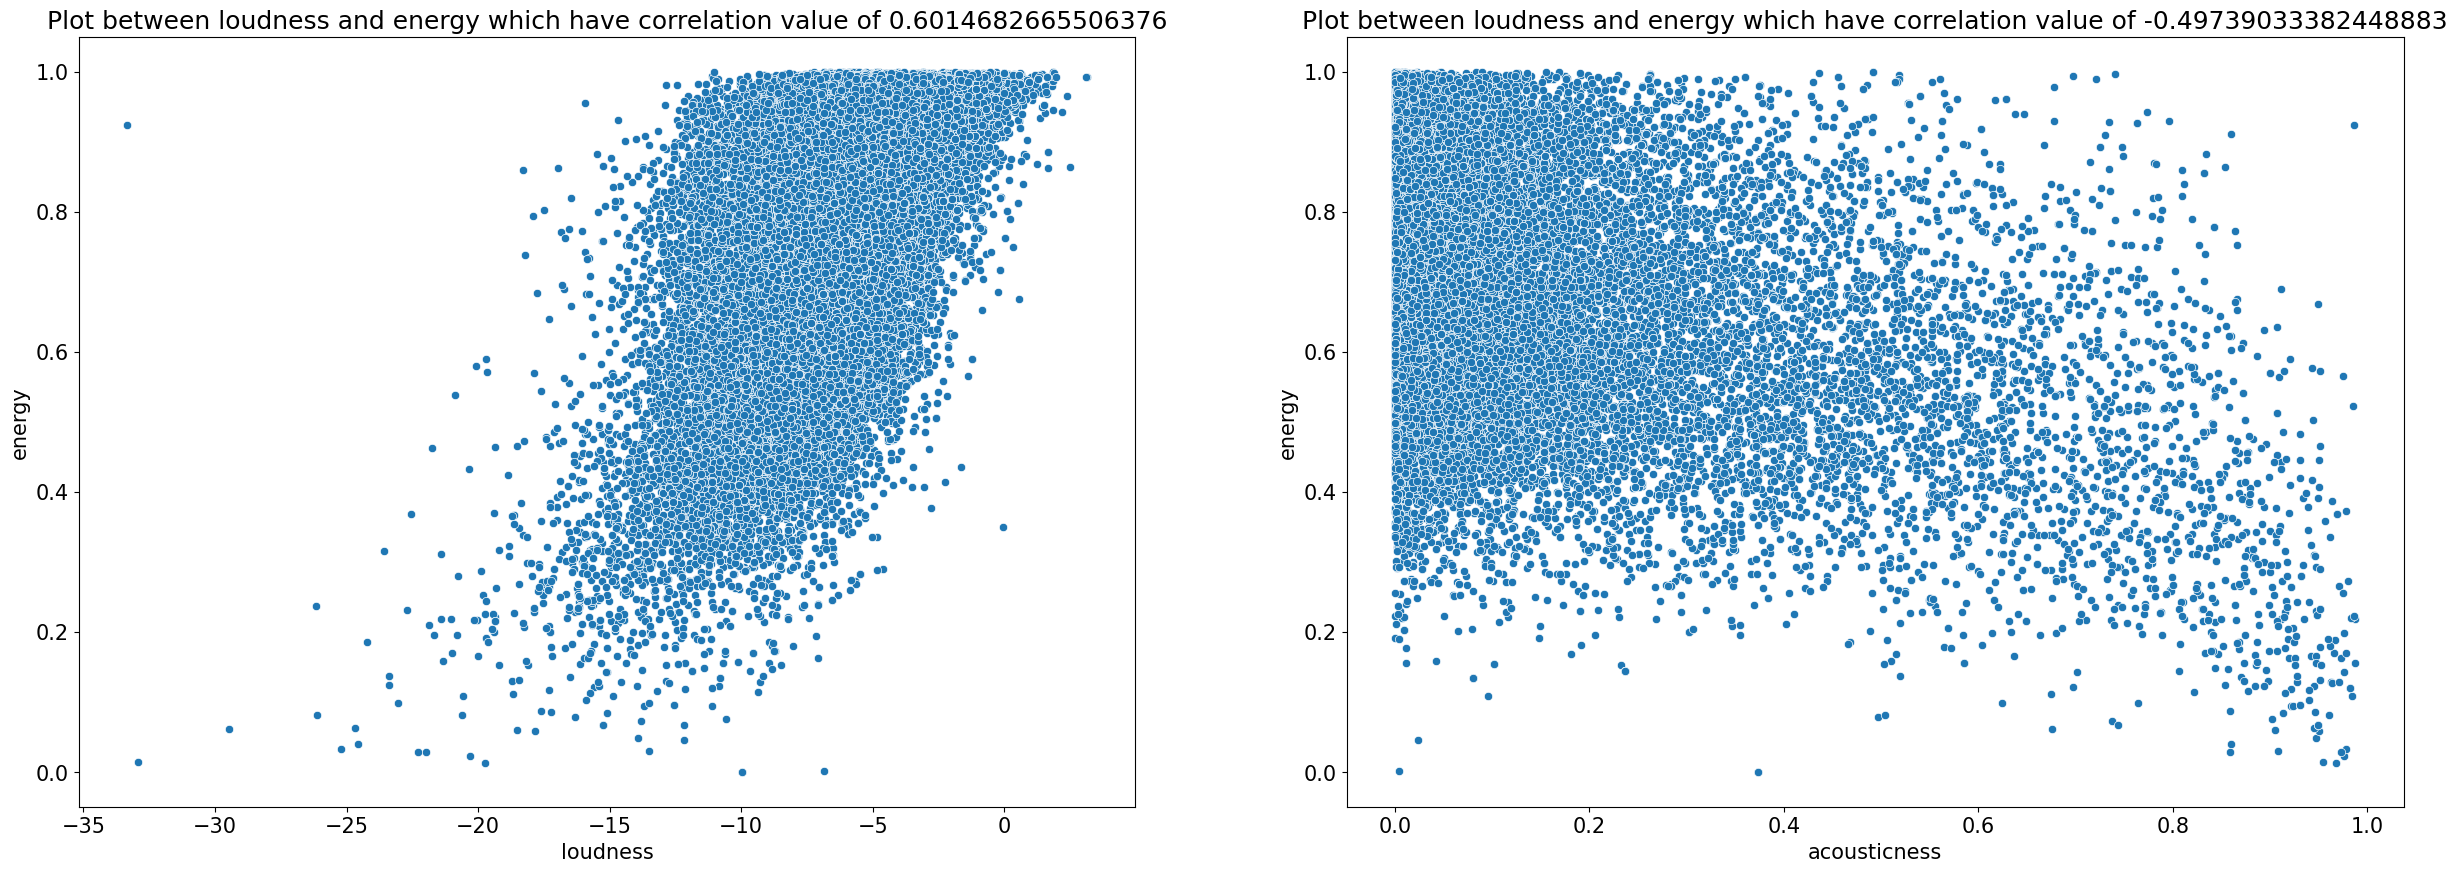

In [25]:
plt.figure(figsize = (30,10))

#plot between parameters with max correlation rating
plt.subplot(121)
sns.scatterplot(x = db['loudness'],y= db['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['loudness']['energy']}")

#plot between parameters with min correlation rating
plt.subplot(122)
sns.scatterplot(x = db['acousticness'],y= db['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['acousticness']['energy']}")

plt.show()

In [26]:
db.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000
mean,0.639358,0.762544,5.369843,-6.464941,0.549446,0.136549,0.096161,0.283069,0.214091,0.357090,147.473466,250876.150760,3.972600
std,0.156622,0.183813,3.666167,2.940971,0.497555,0.126158,0.170836,0.370796,0.175585,0.233195,23.843268,102959.543798,0.268319
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.160000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179853.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005950,0.135000,0.322000,144.973000,224770.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.453000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [27]:

scaler = StandardScaler()
db[['danceability', 'energy','key' , 'loudness' , 'mode' , 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']] = scaler.fit_transform(db[['danceability', 'energy','key' , 'loudness' , 'mode' , 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']])

In [28]:
n_clusters = 15

In [29]:
db.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.223614,0.279938,-0.919184,-0.305705,0.905548,2.246819,-0.212844,-0.727278,-0.902652,0.136840,0.398924,-1.227071,0.102119
1,0.508507,-1.466426,0.717422,-0.260141,0.905548,-0.452997,1.784414,-0.763417,-0.547265,-0.999562,-1.358616,-0.256892,0.102119
2,1.344927,0.709728,-0.100881,0.571907,0.905548,-0.588543,-0.482111,-0.763406,0.899343,-1.363640,2.960054,-1.476861,0.102119
3,-1.043020,0.100405,-1.464720,0.596729,0.905548,-0.265928,-0.424160,-0.763417,-0.570046,-0.780858,1.655604,-1.235598,-3.624835
4,1.012913,-0.753735,-0.919184,-0.409073,0.905548,1.240135,0.707347,-0.763417,-0.273890,1.003079,0.021580,-1.239124,0.102119


In [30]:
cluster_data = db

In [31]:
kmeans = KMeans(n_clusters, random_state=42,max_iter=300)
kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=42)

In [33]:
dbb=pd.read_csv('/content/genres_v2.csv')
db_cat_genres = dbb.replace(dbb['genre'].unique(),[i for i in range(n_clusters)])

<ipython-input-33-4527072304ef>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dbb=pd.read_csv('/content/genres_v2.csv')


In [34]:
clusters = kmeans.labels_

<Axes: xlabel='loudness', ylabel='energy'>

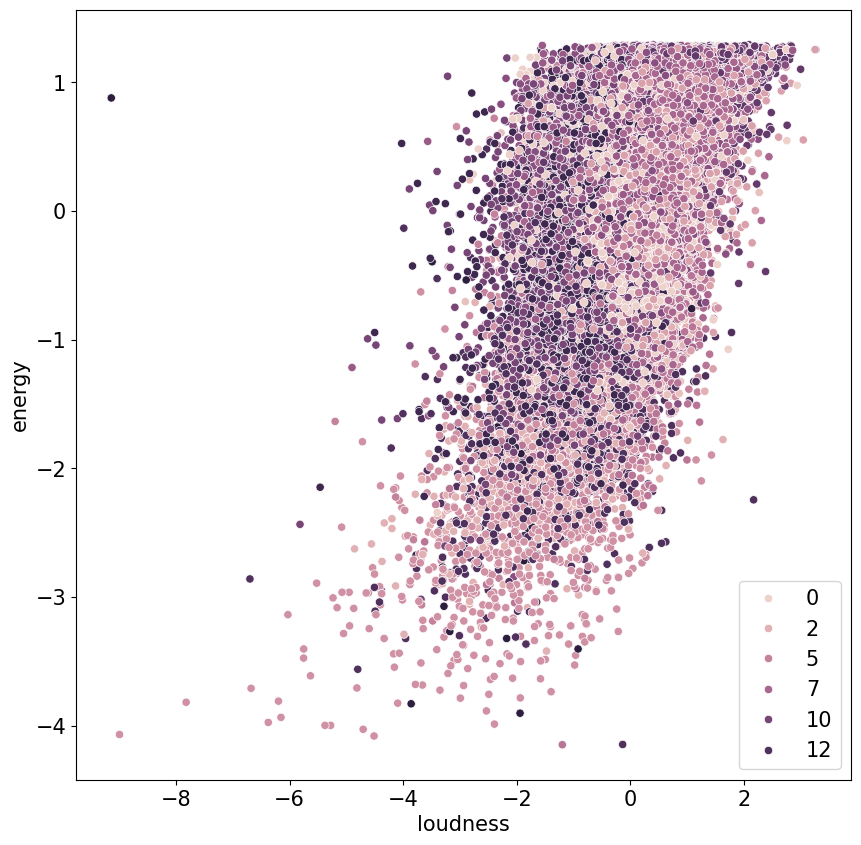

In [35]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = db['loudness'],y= db['energy'], hue=clusters)

In [36]:
Counter(clusters)

Counter({2: 2779,
         12: 3931,
         6: 3981,
         5: 1089,
         11: 2384,
         3: 4158,
         8: 2276,
         1: 3828,
         4: 2356,
         14: 150,
         7: 4248,
         0: 2305,
         9: 2189,
         13: 2988,
         10: 3637})

In [37]:
cluster_genres = {}
for i in set(clusters):
    array = np.array(clusters)
    indices = np.where(array == i)[0]
    cluster_genres[i] = pd.Series(list(dbb.iloc[list(indices)]['genre']))

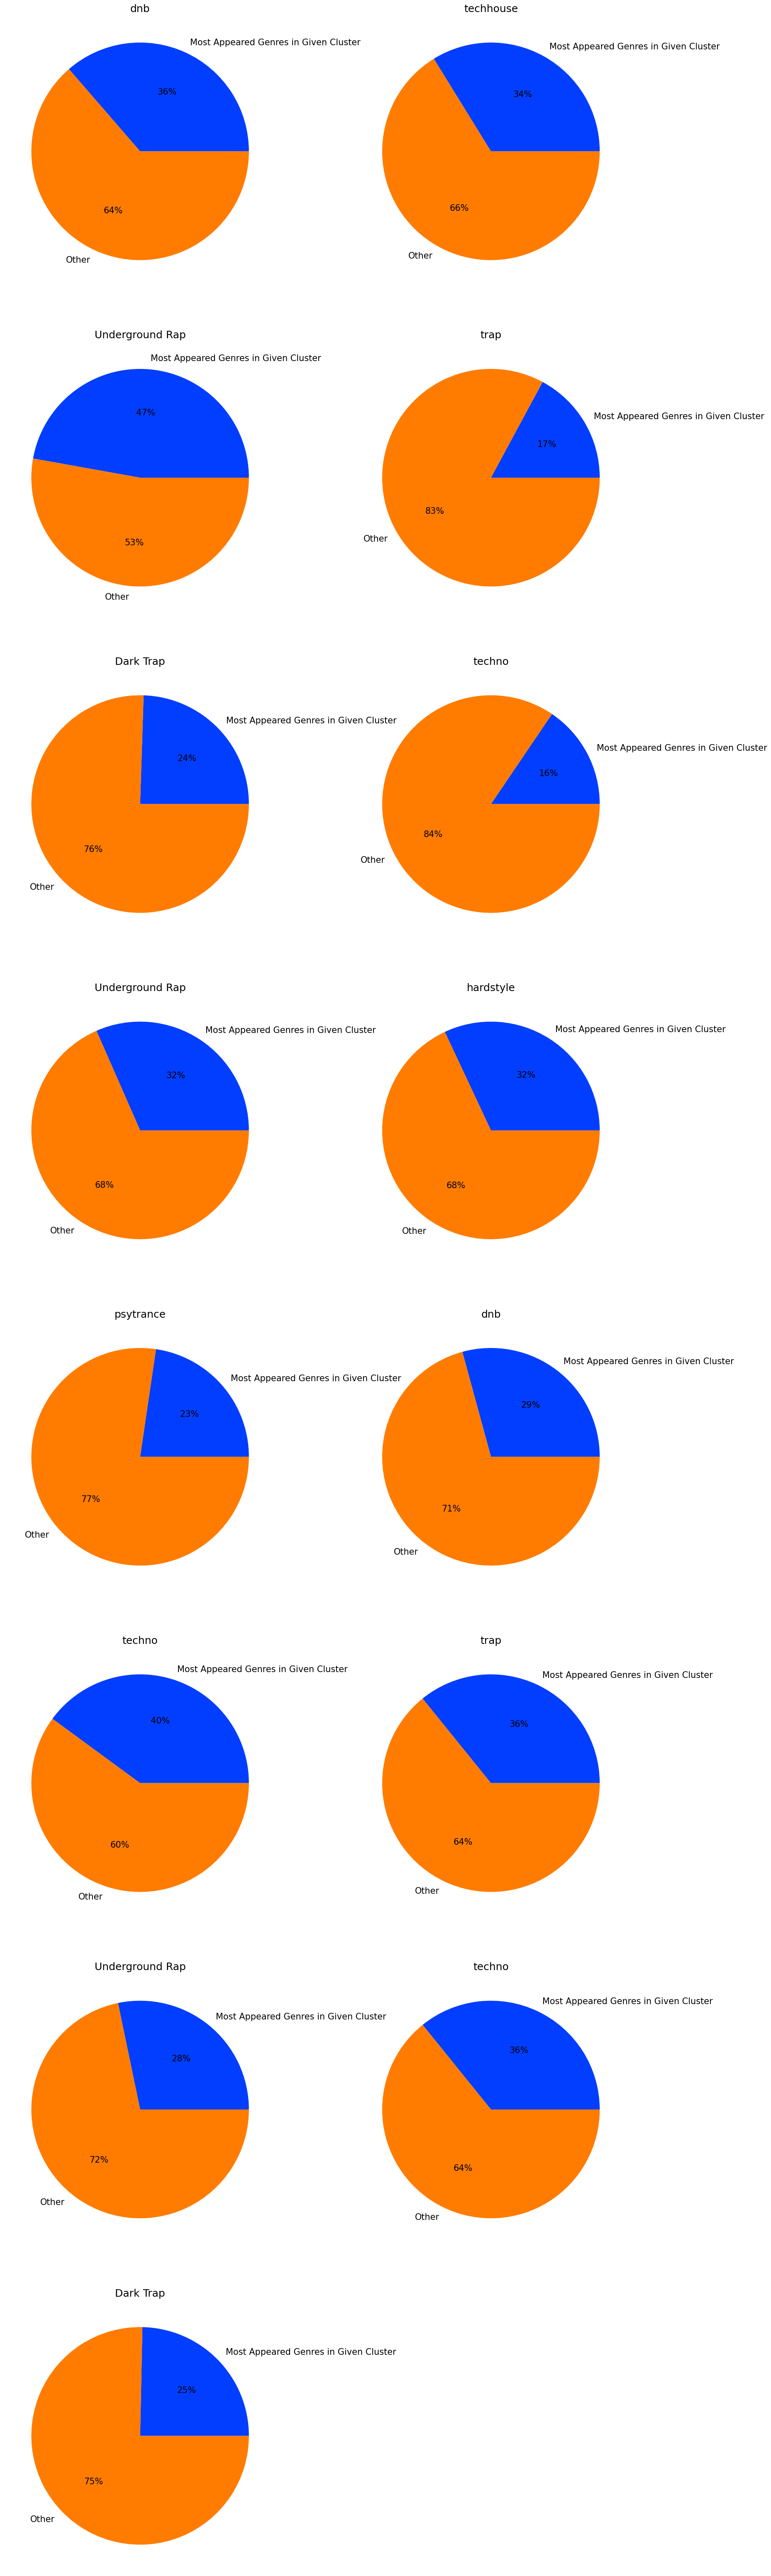

In [38]:
plt.figure(figsize = (20,80))
for i in range(len(cluster_genres)):
    plt.subplot(8,2,i+1)
    keys = ['Most Appeared Genres in Given Cluster','Other']
    most = cluster_genres[i].value_counts()[0]
    other = len(cluster_genres[i]) - most
    palette_color = sns.color_palette('bright')
    plt.pie([most, other], labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(cluster_genres[i].value_counts().index[0])
plt.show()